# Comparing  valuess of the 𝑝-centrality function with values of other centrality measures and the percentage of the differences

Table 2 in the article is based on this notebook

In [1]:
from mygraph import MyGraph
from helpers import *

In [2]:
# Building the graph 
myg = MyGraph()
edge_list = [("A", "B"), ("A", "C"), ("A", "J"), ("A", "Y"), ("A", "H"), ("Y", "I"), ("Y", "L"), ("Y", "H"),  
             ("I", "K"), ("B", "E"), ("B", "D"), ("D", "R"), ("D", "Q"), ("C", "F"), ("F", "E"), ("E", "D"), 
             ("L", "K"), ("K", "P"), ("H", "I"), ("H", "M"), ("M", "N"), ("N", "K") ]
myg.from_edge_list(edge_list)

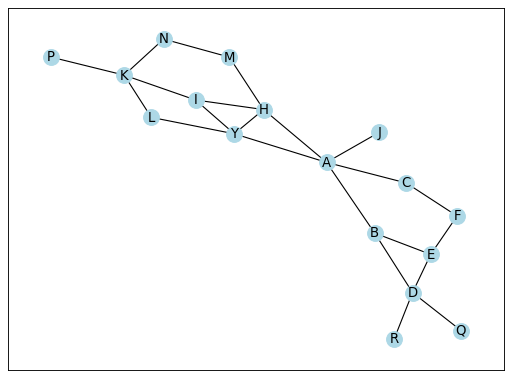

In [3]:
# drawing the graph
dg(myg)

In [4]:
# copying the graph into a NetworkX Graph object
nxg = copy_my_graph(myg)

In [5]:
closeness = nx.closeness_centrality(nxg)
closeness

{'A': 0.48484848484848486,
 'B': 0.41025641025641024,
 'C': 0.35555555555555557,
 'J': 0.3333333333333333,
 'Y': 0.43243243243243246,
 'H': 0.4444444444444444,
 'I': 0.36363636363636365,
 'L': 0.34782608695652173,
 'K': 0.3076923076923077,
 'E': 0.3333333333333333,
 'D': 0.3333333333333333,
 'R': 0.25396825396825395,
 'Q': 0.25396825396825395,
 'F': 0.3137254901960784,
 'P': 0.23880597014925373,
 'M': 0.3404255319148936,
 'N': 0.2909090909090909}

In [6]:
def p_centrality(myg, p, radius, scaling_factor):
    """
    myg: a MyGraph object 
    p: a real number 0 < p < 1
    radius: the maxinum radius of circles around a node that are used to compute the p-centrality function
    scaling_factor: the scaling factor to make the p-centrality function comparable with closeness centrality
    returns: a dictionary whose keys are the nodes of the graph and the values are the p-centrality function of the corresponding node
    """
    ppc = {}
    for node in myg.get_vertex_list():
        circles = myg.circles(node, radius=radius)
        val = 0
        for i in range(radius):
            if i + 1 <= len(circles) - 1:
                val += len(circles[i+1])* p**i
        ppc[node] = val/scaling_factor
    return ppc

In [7]:
ppc = p_centrality(myg, 0.6, 7, 21.15)
errors = []
for x in ppc.keys():
    diff_percecntage = abs(ppc[x]-closeness[x])/closeness[x]
    errors.append(diff_percecntage)
    print(f"{x} -->   c: {round(closeness[x], 3):<{7}}  p: {round(ppc[x], 3):<{7}} error: {round(100 * diff_percecntage, 3):<{6}}% ")
    print("--------------------------------------------")
print("average error: ", round((100 * sum(errors))/len(errors), 3), "%")

A -->   c: 0.485    p: 0.485   error: 0.014 % 
--------------------------------------------
B -->   c: 0.41     p: 0.418   error: 1.898 % 
--------------------------------------------
C -->   c: 0.356    p: 0.351   error: 1.149 % 
--------------------------------------------
J -->   c: 0.333    p: 0.31    error: 7.041 % 
--------------------------------------------
Y -->   c: 0.432    p: 0.437   error: 0.941 % 
--------------------------------------------
H -->   c: 0.444    p: 0.448   error: 0.766 % 
--------------------------------------------
I -->   c: 0.364    p: 0.378   error: 3.852 % 
--------------------------------------------
L -->   c: 0.348    p: 0.347   error: 0.127 % 
--------------------------------------------
K -->   c: 0.308    p: 0.348   error: 12.979% 
--------------------------------------------
E -->   c: 0.333    p: 0.353   error: 5.886 % 
--------------------------------------------
D -->   c: 0.333    p: 0.361   error: 8.155 % 
---------------------------------